Test Accuracy (Before Pruning): 0.7132867132867133


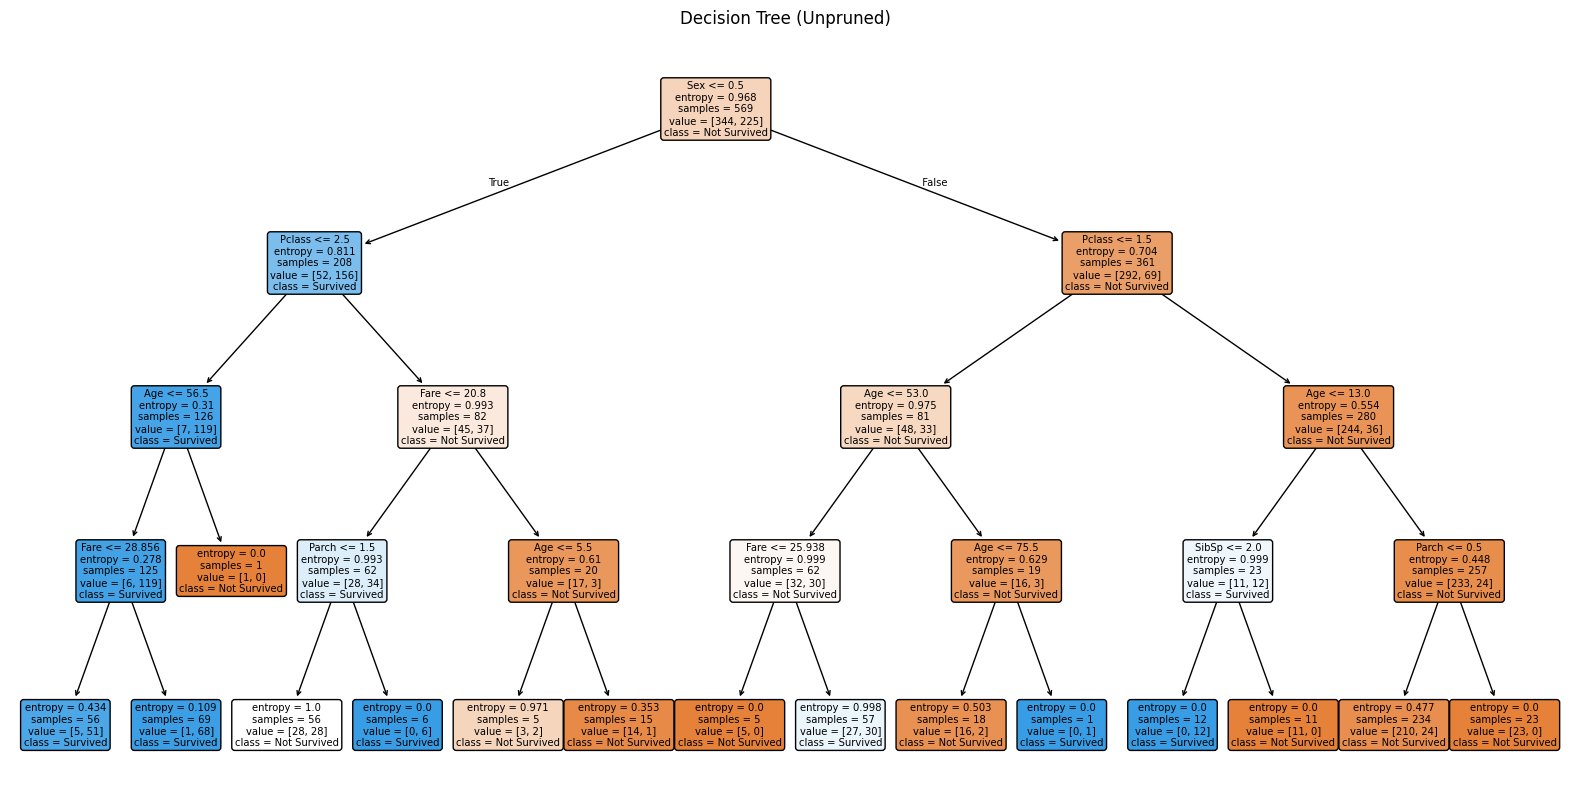

Test Accuracy (After Pruning): 0.7132867132867133


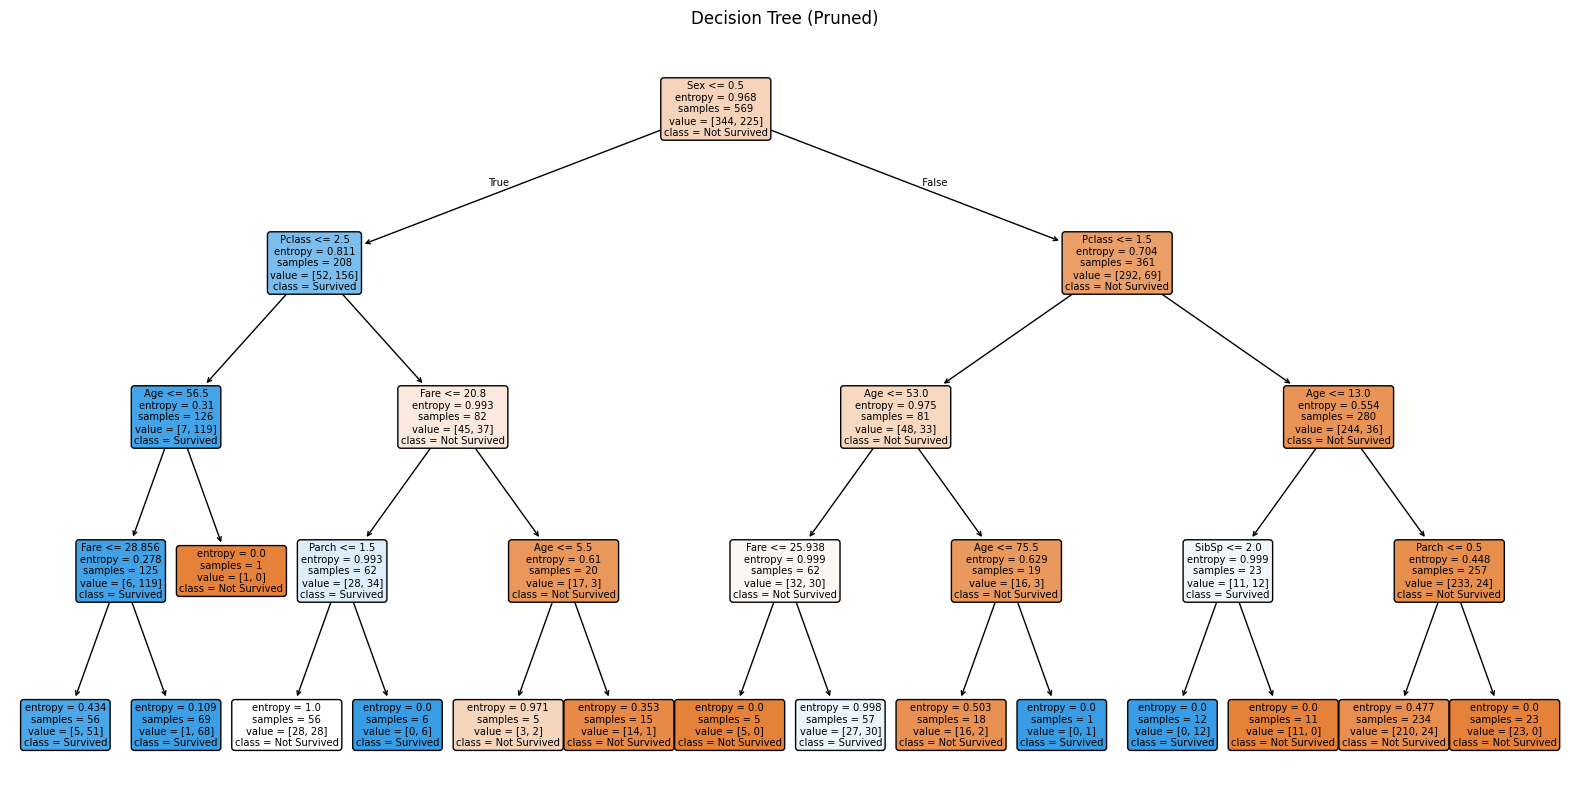

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Step 1: Download and Load the Titanic Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 2: Preprocess the dataset
# Select relevant features and drop rows with missing values
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].dropna()

# Encode categorical features
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])         # male=1, female=0
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

# Step 3: Split the data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree with Entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

print("Test Accuracy (Before Pruning):", clf.score(X_test, y_test))

# Step 5: Visualize the Full Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'],
          filled=True, rounded=True, impurity=True)
plt.title("Decision Tree (Unpruned)")
plt.show()

# Step 6: Prune the Tree (remove weak splits)
# Reason: Nodes with very low sample count or low info gain can cause overfitting
clf_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10, random_state=42)
clf_pruned.fit(X_train, y_train)

print("Test Accuracy (After Pruning):", clf_pruned.score(X_test, y_test))

# Step 7: Visualize the Pruned Tree
plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, feature_names=X.columns, class_names=['Not Survived', 'Survived'],
          filled=True, rounded=True, impurity=True)
plt.title("Decision Tree (Pruned)")
plt.show()

# Notes:
# - Nodes are split based on highest Information Gain (Entropy decrease).
# - Pruning avoids overfitting by removing nodes with few samples (min_samples_split=10).
# - You can adjust pruning parameters like max_depth or min_impurity_decrease.
